In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [3]:
# Read Dataframe from outputs
year = 2014
df = pd.read_csv(f'../outputs/prcp/{year}/CA_{year}_prcp_data.csv')

In [4]:
df

,station,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2014-12-26,2014-12-27,2014-12-28,2014-12-29,2014-12-30,2014-12-31,lat,lon,elev,name
0,US1CAAL0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.8123,-122.2160,113.4,CA PIEDMONT 1.0 SE
1,US1CAAL0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,37.7169,-122.0585,163.4,CA CASTRO VALLEY 0.4 NNE
2,US1CAAL0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.6483,-121.8745,107.0,CA PLEASANTON 1.8 SSE
3,US1CAAL0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.8319,-122.2503,58.2,CA OAKLAND 4.4 NNW
4,US1CAAL0007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.5150,-121.9523,9.1,CA FREMONT 2.6 ESE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,USW00093241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38.3775,-121.9586,31.7,CA VACAVILLE/NUT TREE AP ASOS
1111,USW00093242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36.9850,-120.1106,76.5,CA MADERA MUNI AP
1112,USW00093243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.2381,-120.8825,23.8,CA MERCED 23 WSW CRN
1113,USW00093245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,38.3208,-123.0747,19.2,CA BODEGA 6 WSW CRN


In [5]:
# Get columns to convert to numerics
date_columns = df.columns[1:366]  # Adjust this if necessary

# Convert the daily columns to numeric (if they are not already)
df[date_columns] = df[date_columns].apply(pd.to_numeric, errors='coerce')

In [6]:
# Initialize a dictionary to hold the monthly data
monthly_data = {}

# Iterate over each station
for station in df.index:
    monthly_totals = []
    for month in range(1, 13):
        # Generate the date range for the current month
        days_in_month = pd.date_range(f'{year}-{month:02d}-01', periods=31)  # Adjust periods for different months if necessary
        days_in_month = days_in_month[days_in_month.month == month]  # Ensure only the current month is included
        
        # Find the corresponding columns in the DataFrame
        daily_columns = [col for col in df.columns if col in days_in_month.strftime('%Y-%m-%d')]
        
        # Sum the daily values for the current month
        monthly_total = df.loc[station, daily_columns].sum()
        monthly_totals.append(monthly_total)
    
    monthly_data[station] = monthly_totals

In [7]:
# Create a new DataFrame with the monthly totals
monthly_df = pd.DataFrame(monthly_data, index=[f'{year}-{month:02d}' for month in range(1, 13)]).T

# Remove rows with NaN values
# monthly_df = monthly_df.dropna()
monthly_df = monthly_df.loc[(monthly_df!=0).any(axis=1)]

monthly_df

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12
0,2.1,165.2,74.2,73.1,0.0,0.0,0.0,0.0,14.3,12.2,56.2,295.0
1,3.8,123.8,60.0,43.1,0.0,0.5,0.0,0.8,16.0,13.3,69.6,307.8
2,2.8,54.7,13.3,11.5,0.0,0.0,0.3,0.0,7.6,5.6,40.3,128.4
3,1.6,165.7,70.8,66.0,0.0,0.0,0.0,0.0,0.0,0.5,59.8,343.6
4,3.1,72.2,22.1,38.4,1.0,0.0,0.0,0.5,11.4,4.1,37.2,260.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1110,3.8,176.3,28.2,37.6,0.0,0.0,1.0,0.0,12.0,20.3,49.9,244.6
1111,8.7,52.3,16.9,14.2,0.0,0.0,0.0,0.0,0.8,9.7,10.8,39.8
1112,7.3,50.6,25.5,22.4,0.8,0.0,0.0,0.0,2.4,23.5,20.7,99.7
1113,10.0,290.2,104.1,30.6,3.7,4.8,7.0,6.9,6.0,0.0,0.0,0.0


In [8]:
# Sum each month
monthly_sums = monthly_df.sum(axis=0)

monthly_sums

2014-01     12597.7
2014-02    129308.2
2014-03     86142.7
2014-04     34343.4
2014-05      6999.6
2014-06      1545.2
2014-07      3326.8
2014-08      5901.1
2014-09     17880.1
2014-10     23147.1
2014-11     55227.6
2014-12    212372.9
dtype: float64

In [9]:
# Select only the monthly columns (assuming the last few columns are metadata and not needed here)
monthly_sums = monthly_sums.iloc[:12]

# Create a dictionary to map month numbers to abbreviations
month_mapping = {
    f'{year}-01': 'Jan', f'{year}-02': 'Feb', f'{year}-03': 'Mar', f'{year}-04': 'Apr',
    f'{year}-05': 'May', f'{year}-06': 'Jun', f'{year}-07': 'Jul', f'{year}-08': 'Aug',
    f'{year}-09': 'Sep', f'{year}-10': 'Oct', f'{year}-11': 'Nov', f'{year}-12': 'Dec'
}

# Rename the Series index using the month mapping
monthly_sums.index = monthly_sums.index.map(month_mapping)

# Convert millimeters to inches and round to 2 decimal places
monthly_sums = (monthly_sums * 0.0393701).round(2)

monthly_sums

Jan     495.97
Feb    5090.88
Mar    3391.45
Apr    1352.10
May     275.57
Jun      60.83
Jul     130.98
Aug     232.33
Sep     703.94
Oct     911.30
Nov    2174.32
Dec    8361.14
dtype: float64

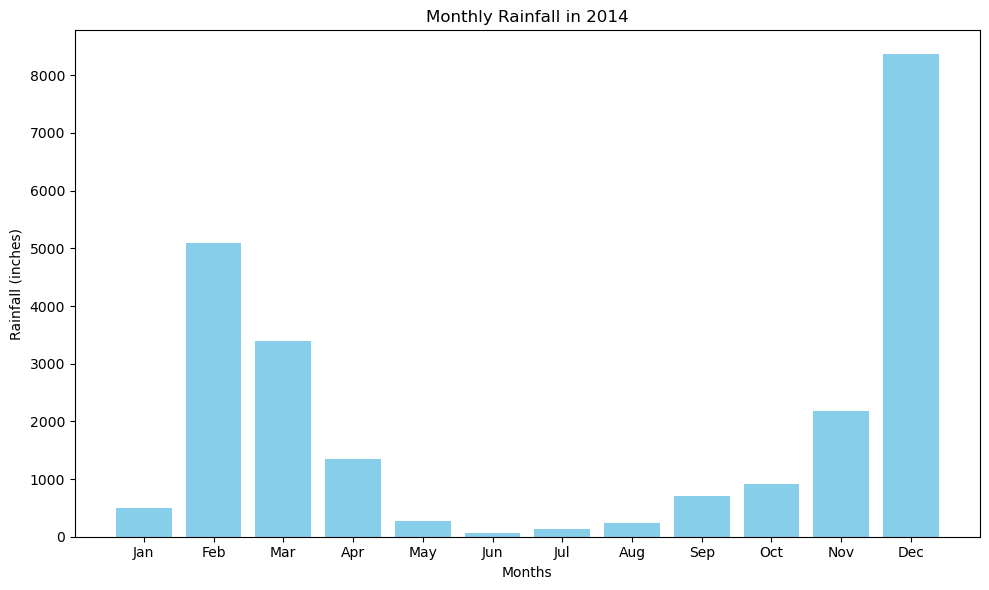

In [10]:
# Extract months and rainfall values from monthly_sums2016
months = list(monthly_sums.index)
rainfall_values = list(monthly_sums.values)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, rainfall_values, color='skyblue')

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Rainfall (inches)')
plt.title(f'Monthly Rainfall in {year}')

# Adjust layout for better appearance
plt.tight_layout()

# Define output path and create directory if it doesn't exist
output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "output" folder
output_file = output_path / f"Monthly_Rainfall_{year}.png"
plt.savefig(output_file)

# Show the plot
plt.show()